## Where is the University of California Getting it's Insurance?

This notebook analyses UC insurance contracts obtained by a freedom of information act inquiry.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
# Map child companies to parents
family = dict()

family['safety national'] = 'tokio marine'

family['philadelphia'] = 'tokio marine'

In [3]:
rawdata_filename = 'CPRA #20-3063 9.23.2020.xlsx'

In [4]:
# Load all sheets
rawdata_excel = pd.read_excel(rawdata_filename, sheet_name=None)

In [5]:
# Get sheet names
sheet_names = list(rawdata_excel.keys())
sheet_names

['UC Regents Policies',
 'Fiat Lux Policies',
 'UC Construction Policies',
 'Fees']

### Let's look at the UC Regents Policies first

In [6]:
#Clean up the header and label the renewal date column
regents_policies = pd.read_excel(rawdata_filename, sheet_name=sheet_names[0], header=2)

#There are trailing spaces in some of the column names in the raw datafile

#Rename the columns
regents_policies.rename(columns={'Policy ': 'Policy',
                                 'Carrier ': 'Carrier',
                                 'Premium ': 'Premium',
                                 'Unnamed: 3': "Renewal"}, inplace=True)

regents_policies

,Policy,Carrier,Premium,Renewal
0,Aviation-Aiport General Liability,Chubb,75002.00,NaN
1,Unmanned Aerial Vehicle Liability,Chubb,35000.00,NaN
2,Nuclear Liability,ANO,18743.00,NaN
3,Employment Practices Liability,Allied World,667575.00,NaN
4,NaN,Beazley,496890.63,NaN
...,...,...,...,...
61,UCIP General Liability,American International Group Inc,184090.00,NaN
62,NaN,Liberty Mutual Insurance Company,935455.00,NaN
63,NaN,Zurich American Insurance Company,51577.00,NaN
64,UCIP Workers Comp,Liberty Mutual Insurance Company,2734238.00,NaN


In [7]:
def prep_for_merge(df, column):
    
    #remove trailing spaces
    df[column] = df[column].str.strip()
    
    #lowercase
    df[column] = df[column].str.lower()
    
    return df

In [8]:
regents_policies = prep_for_merge(regents_policies, 'Carrier')

In [9]:
#Clean up data types
regents_policies = regents_policies.convert_dtypes()

In [10]:
regents_policies

,Policy,Carrier,Premium,Renewal
0,Aviation-Aiport General Liability,chubb,75002.00,<NA>
1,Unmanned Aerial Vehicle Liability,chubb,35000.00,<NA>
2,Nuclear Liability,ano,18743.00,<NA>
3,Employment Practices Liability,allied world,667575.00,<NA>
4,<NA>,beazley,496890.63,<NA>
...,...,...,...,...
61,UCIP General Liability,american international group inc,184090.00,<NA>
62,<NA>,liberty mutual insurance company,935455.00,<NA>
63,<NA>,zurich american insurance company,51577.00,<NA>
64,UCIP Workers Comp,liberty mutual insurance company,2734238.00,<NA>


In [11]:
#So which companies are we paying and how much?

"Projects with a projected construction value of $25 million and over (total for all phases) are to be insured under the University Controlled Insurance Program, or “UCIP.”  The UCIP is a single insurance program that insures the University of California, Enrolled Contractors, Enrolled Subcontractors, and other designated parties (“Contractors”) for Work performed at the Project Site."

https://www.ucop.edu/construction-services/programs-and-processes/university-controlled-insurance-program/ucip.html

In [12]:
## What about the other sheets?

In [13]:
#Clean up the header and label the renewal date column
fiatlux_policies = pd.read_excel(rawdata_filename, sheet_name=sheet_names[1], header=2)

#Rename the columns
fiatlux_policies.rename(columns={'Policy ': 'Policy',
                                 'Carrier ': 'Carrier',
                                 'Premium ': 'Premium',
                                 'Unnamed: 3': "Renewal"}, inplace=True)

#Remove leading or trailing spaces and lowercase Carrier column
fiatlux_policies = prep_for_merge(fiatlux_policies, 'Carrier')

fiatlux_policies

,Policy,Carrier,Premium,Renewal
0,Cyber,brit axis,1300915.93,NaN
1,NaN,axa xl,566985.00,NaN
2,NaN,hiscox markel,938212.10,NaN
3,NaN,channel barnican,371700.00,NaN
4,NaN,starr indemnity,180894.00,NaN
5,NaN,echo,456907.06,NaN
6,Sexual Molestaton Liability,beazley,897645.00,NaN
7,Terrorism,talbot,249775.00,NaN
8,All Risk Property,zurich american insurance company,5548846.00,NaN
9,Boiler and Machinery,travelers,713890.00,NaN


In [14]:
# Can these companies be grouped more coursely? - yes once the total dataframe is generated. This gives the full list of companies

In [15]:
uc_construction = pd.read_excel(rawdata_filename, sheet_name=sheet_names[2], header=2)

#Rename the columns
uc_construction.rename(columns={'COVERAGE TYPE': 'Policy',
                                 'INSURANCE COMPANY': 'Carrier',
                                 'PREMIUM': 'Premium'}, inplace=True)

#Remove leading or trailing spaces and lowercase Carrier column
uc_construction = prep_for_merge(uc_construction, 'Carrier')

uc_construction

,Policy,Carrier,Premium
0,Builder's Risk,allianz,859694
1,NaN,liberty mutual insurance company,119922
2,NaN,starr companies,22633
3,NaN,underwriters lloyds insurance company,282270
4,NaN,westchester surplus lines insurance company,218250
5,NaN,zurich american insurance company,1964
6,Contractors Pollution Liability,great american insurance company,5038
7,UCIP Excess Liability,ace american insurance company,6759
8,NaN,allied world assurance company us inc,110666
9,NaN,axis insurance company,50000


In [16]:
#How much are we paying Liberty Mutual in total?
combined = pd.concat([regents_policies, fiatlux_policies, uc_construction])

#Replace 'swissre' with 'swiss re'
combined.Carrier = combined.Carrier.replace('swissre', 'swiss re')

totals = combined.groupby(by='Carrier').sum().sort_values('Premium', ascending=False).reset_index()
totals

,Carrier,Premium
0,liberty mutual insurance company,8022010.00
1,zurich american insurance company,5774554.00
2,safety national,4794656.00
3,swiss re,2710312.50
4,beazley,2628937.63
...,...,...
70,liberty mutual,12650.00
71,endurance risk solutions,12650.00
72,auw,11750.00
73,noa,10500.00


In [17]:
##Save the totals - this may alter exisiting graphs
#totals.to_pickle('C:/Users/David Brown/Documents/PythonScripts_New/Climate Crisis/uc_insurers_2020/uc_insurance_totals.pkl')

## UC paid Liberty Mutual over 8,000,000 dollars in 2020.

"Liberty Mutual is a top global insurer of coal, oil, and gas. It also invests more than \\$8.9 billion in fossil fuel companies and utilities, including $1.5 billion in thermal coal. Yet, while fueling the climate crisis, Liberty Mutual is withdrawing coverage from and jacking up the costs of insurance for longtime customers in areas at risk of climate change impacts, like wildfire-affected counties in California."

https://www.ran.org/press-releases/insure-our-future-campaign-targets-liberty-mutual/

## How do these companies score?

In [120]:
scoring_sheet_names

['Underwriting',
 'Ranking  per category',
 'Overall scores',
 'Investment',
 'Other Climate leadership']

In [18]:
scoring_filename = 'C:/Users/David Brown/Documents/PythonScripts_New/Climate Crisis/uc_insurers_2020/Unfriend Coal/Unfriend Coal_Insure Our Future_Scoring sheet - Scorecard 2019.xlsx'

# Load all sheets
scoring_excel = pd.read_excel(scoring_filename, sheet_name=None)

# Get sheet names
scoring_sheet_names = list(scoring_excel.keys())
scoring_sheet_names

# Get overall scores
overall = pd.read_excel(scoring_filename, sheet_name=scoring_sheet_names[2], header=None)

#For some reason the header is at the bottom.
overall.columns = list(overall.tail(1).reset_index(drop=True).loc[0,:])
overall.drop(overall.tail(1).index, inplace=True)

names = list(overall.columns)
names[0] = 'Carrier'
overall.columns = names

# Add Sum
overall['Sum'] = overall.convert_dtypes().sum(axis=1)

#Remove leading or trailing spaces and lowercase Carrier column
overall = prep_for_merge(overall, 'Carrier')

overall

,Carrier,Underwriting,Investing,Other CL,Sum
0,aig,0,0,0.6,0.6
1,berkshire hathaway,0,0,0,0.0
2,fm global,0,0,0,0.0
3,liberty mutual,0,0,0,0.0
4,lloyd's,0,2.2,0.9,3.1
5,ms&ad,0,0,1.1,1.1
6,samsung fm,0,0,1,1.0
7,sompo,0,0,1.7,1.7
8,tokio marine,0,0,1.8,1.8
9,sinosure,0,0,0,0.0


In [19]:
uc_scores = pd.merge(totals, overall, on='Carrier', how='outer')

uc_scores

,Carrier,Premium,Underwriting,Investing,Other CL,Sum
0,liberty mutual insurance company,8022010.00,NaN,NaN,NaN,NaN
1,zurich american insurance company,5774554.00,NaN,NaN,NaN,NaN
2,safety national,4794656.00,NaN,NaN,NaN,NaN
3,swiss re,2710312.50,4,5.1,3.7,12.8
4,beazley,2628937.63,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
94,axa 2019,NaN,4.7,5.1,5,14.8
95,l&g,NaN,NaN,1,6.4,7.4
96,metlife,NaN,NaN,0,0.4,0.4
97,prudential,NaN,NaN,0,0.8,0.8


In [20]:
# Look for nested matchings
# Make a mapping dictionary 'key' = long name, 'value' = shorter name
nested = dict()

string_list = uc_scores.Carrier.sort_values()
substrings  = uc_scores.Carrier.sort_values()

for x in string_list:
    for y in substrings:
        if y != x:
            if y in x:
                nested.update({x:y})

nested

{'allied world assurance company us inc': 'allied world',
 'allied world bermuda': 'allied world',
 'berkshire hathaway inc': 'berkshire hathaway',
 'brit axis': 'brit',
 'chubb bermuda': 'chubb',
 'great american assurance company': 'great american',
 'great american insurance company': 'great american',
 'hannover re': 'hannover',
 'hdu/noa': 'noa',
 'hiscox markel': 'hiscox',
 'kln/fidelis': 'fidelis',
 'landmark (rsui)': 'rsui',
 'liberty mutual insurance company': 'liberty mutual',
 'sompo holdings inc': 'sompo',
 'starr indemnity and liability company': 'starr indemnity',
 'zurich american insurance company': 'zurich',
 'zurich insurance company': 'zurich'}

In [21]:
# Map longer names onto shorter ones.
# This makes assumptions about the relationship of abbreviated names.
tidy = uc_scores.copy()
tidy.Carrier = tidy.Carrier.replace(nested)

tidy = tidy.convert_dtypes()

# Aggregate but treat NAs and zeros differently.
#By setting min_count=1, numeric values will overwrite NaN values.
tidy = tidy.groupby('Carrier').sum(min_count=1).sort_values('Premium', ascending=False).reset_index()
tidy

,Carrier,Premium,Underwriting,Investing,Other CL,Sum
0,liberty mutual,8034660.0,0.0,0.0,0.0,0.0
1,zurich,5793529.0,3.8,4.3,5.3,13.4
2,safety national,4794656.0,NaN,NaN,NaN,NaN
3,swiss re,2710312.5,4.0,5.1,3.7,12.8
4,chubb,2665148.0,1.7,2.5,0.7,4.9
...,...,...,...,...,...,...
77,scor,NaN,1.7,NaN,1.3,3.0
78,sinosure,NaN,0.0,0.0,0.0,0.0
79,tiaa family,NaN,NaN,0.0,1.3,1.3
80,tokio marine,NaN,0.0,0.0,1.8,1.8


In [22]:
tidy.Carrier = tidy.Carrier.replace(family)

# Aggregate but treat NAs and zeros differently.
#By setting min_count=1, numeric values will overwrite NaN values.
tidy = tidy.groupby('Carrier').sum(min_count=1).sort_values('Premium', ascending=False).reset_index()
tidy.head(10)

,Carrier,Premium,Underwriting,Investing,Other CL,Sum
0,liberty mutual,8034660.00,0.0,0.0,0.0,0.0
1,tokio marine,7042271.52,0.0,0.0,1.8,1.8
2,zurich,5793529.00,3.8,4.3,5.3,13.4
3,swiss re,2710312.50,4.0,5.1,3.7,12.8
4,chubb,2665148.00,1.7,2.5,0.7,4.9
5,beazley,2628937.63,NaN,NaN,NaN,NaN
6,brit,2159815.93,NaN,NaN,NaN,NaN
7,allianz,1719388.00,2.1,NaN,6.0,8.1
8,convex,1200750.00,NaN,NaN,NaN,NaN
9,hiscox,1115096.10,NaN,NaN,NaN,NaN


In [23]:
## Tidy names early

In [182]:
def tidy_names(df):
    
    #remove trailing spaces
    df.Carrier = df.Carrier.str.strip()
    
    #lowercase
    df.Carrier = df.Carrier.str.lower()
    
    df.Carrier = df.Carrier.replace(nested)
    df.Carrier = df.Carrier.replace(family)
    
    return df

In [180]:
tidy_regents_policies = tidy_names(regents_policies)

#Replace 'swissre' with 'swiss re'
tidy_regents_policies.Carrier = tidy_regents_policies.Carrier.replace('swissre', 'swiss re')

tidy_fiatlux_policies = tidy_names(fiatlux_policies)
tidy_uc_construction  = tidy_names(uc_construction)
tidy_totals           = tidy_names(totals)

In [98]:
def bar_plot(df, head, color, ax=None):
    
    # Restore Title case
    df.Carrier = df.Carrier.str.title()
    
    df = df.sort_values('Premium', ascending=False).head(head)

    df.plot.bar('Carrier', 'Premium', color=color, edgecolor='k', ax=ax, legend=None);
    
    if ax is None:
        ax=plt.gca()
        
    ax.set_xlabel(None)
    ax.set_ylabel('United States Dollars');

    #Give dollars with zeros and commas
    ax.get_yaxis().set_major_formatter(
        ticker.FuncFormatter(lambda y, p: format(int(y), ',')))
    
    #Turn off the top and right hand axis lines.
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)


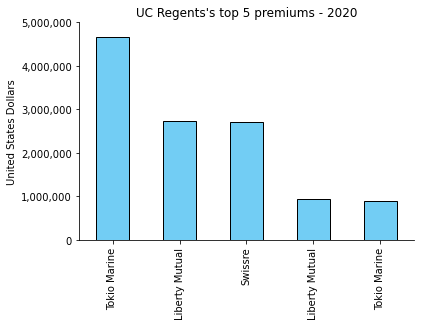

In [118]:
bar_plot(tidy_regents_policies, 5, color='#72CDF4')
plt.ylim(0, 5000000);
plt.title("UC Regents's top 5 premiums - 2020");

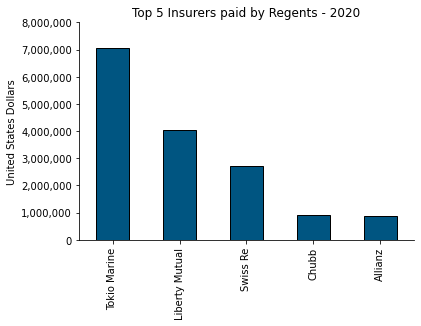

In [181]:
#What if you group the premiums?
df = tidy_regents_policies
df = df.groupby('Carrier').sum().reset_index()
bar_plot(df, 5, color='#005581')
plt.ylim(0, 8000000);
plt.title('Top 5 Insurers paid by Regents - 2020');

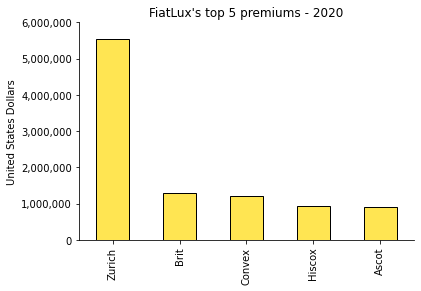

In [71]:
bar_plot(tidy_fiatlux_policies, 5, color='#FFE552')
plt.ylim(0, 6000000);
plt.title("FiatLux's top 5 premiums - 2020");
# Who are 'Brit Axis', combined here with Brit, but nto sure if Brit Axis exist.

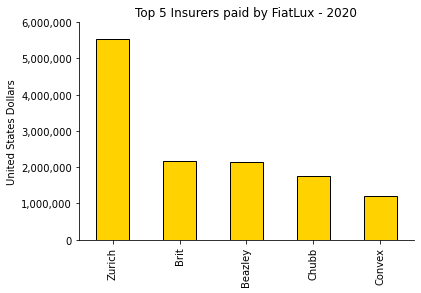

In [72]:
#What if you group the premiums?
df = tidy_fiatlux_policies
df = df.groupby('Carrier').sum().reset_index()
bar_plot(df, 5, color='#FFD200')
plt.ylim(0, 6000000);
plt.title('Top 5 Insurers paid by FiatLux - 2020');

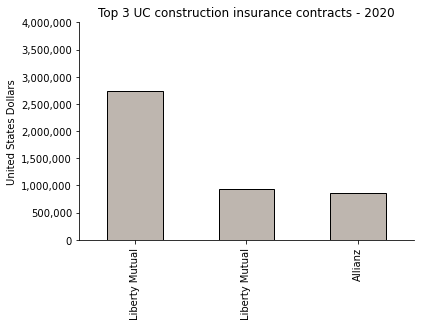

In [73]:
bar_plot(tidy_uc_construction, 3, color='#BEB6AF')
plt.ylim(0, 4000000);
plt.title("Top 3 UC construction insurance contracts - 2020");

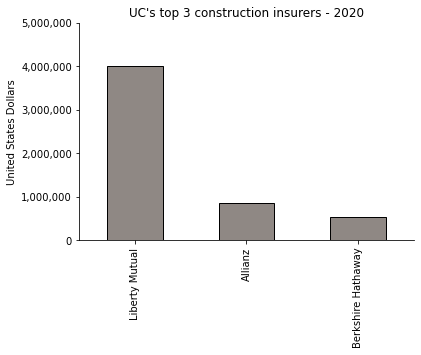

In [74]:
#What if you group the premiums?
df = tidy_uc_construction
df = df.groupby('Carrier').sum().reset_index()
bar_plot(df, 3, color='#8F8884')
plt.ylim(0, 5000000);
plt.title("UC's top 3 construction insurers - 2020");

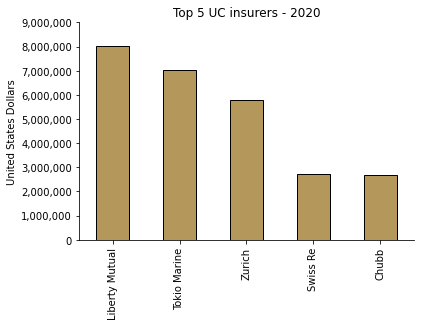

In [75]:
df = tidy_totals
df = df.groupby('Carrier').sum().reset_index()
bar_plot(df, 5, color='#B4975A')
plt.ylim(0, 9000000);
plt.title('Top 5 UC insurers - 2020');

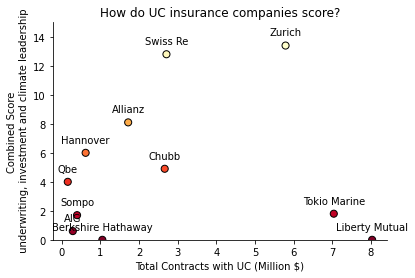

In [36]:
# This plot shows UC spending against climate ranking, considering the parent company Tokio Marine.
xs = tidy.Premium
ys = tidy.Sum

labels = tidy.Carrier.str.title()

#Recapitalize AIG
labels = [label.replace('Aig', 'AIG') for label in labels]

plt.scatter(xs, ys, s=50, c=ys, cmap='YlOrRd_r', edgecolors ='k'); ## Color by score, yellow to red.
plt.title('How do UC insurance companies score?');
plt.ylabel('Combined Score\n underwriting, investment and climate leadership');
plt.xlabel('Total Contracts with UC (Million $)');
plt.ylim(0,15);

#Turn off the top and right hand axis lines.
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

n=int(0)

# zip joins x and y coordinates in pairs
for x, y in zip(xs,ys):

    label = labels[n]

    # this method is called for each point
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    n+=1

In [106]:
## Define ymax
ymax = tidy.Premium.max()+500000

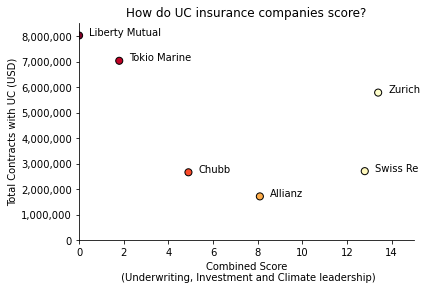

In [107]:
# Flip axes
# This plot shows UC spending against climate ranking, considering the parent company Tokio Marine.
df = tidy.head(10)

xs = df.Sum
ys = df.Premium

labels = tidy.Carrier.str.title()

#Recapitalize AIG
labels = [label.replace('Aig', 'AIG') for label in labels]

plt.scatter(xs, ys, s=50, c=xs, cmap='YlOrRd_r', edgecolors ='k'); ## Color by score, yellow to red.
plt.title('How do UC insurance companies score?');
plt.xlabel('Combined Score\n (Underwriting, Investment and Climate leadership)');
plt.ylabel('Total Contracts with UC (USD)');
plt.xlim(0,15);
plt.ylim(0, ymax);

#Turn off the top and right hand axis lines.
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

n=int(0)

# zip joins x and y coordinates in pairs
for x, y in zip(xs,ys):

    label = labels[n]

    # this method is called for each point
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(10,0), # distance from text to points (x,y)
                 ha='left') # horizontal alignment can be left, right or center
    n+=1
    
#Give dollars with zeros and commas
plt.gca().get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda y, p: format(int(y), ',')))

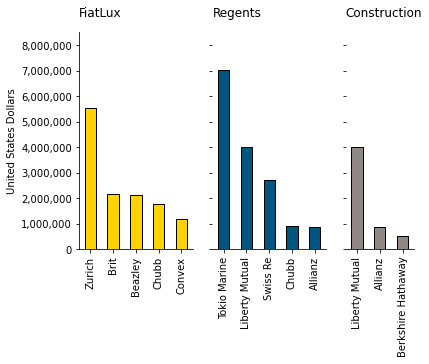

In [183]:
## Arrange plots in grid
fig, axes = plt.subplots(1,3, sharey=True, gridspec_kw = {'width_ratios': [5,5,3]})

# Panel 1
df = tidy_fiatlux_policies
df = df.groupby('Carrier').sum().reset_index()
bar_plot(df, 5, color='#FFD200',ax=axes[0])
axes[0].set_title('FiatLux', loc='left', pad=15)

# Panel 2
df = tidy_regents_policies
df = df.groupby('Carrier').sum().reset_index()
bar_plot(df, 5, color='#005581',ax=axes[1])
axes[1].spines['left'].set_visible(False)
axes[1].set_title('Regents', loc='left', pad=15)

# Panel 3
df = tidy_uc_construction
df = df.groupby('Carrier').sum().reset_index()
bar_plot(df, 3, color='#8F8884',ax=axes[2])
axes[2].spines['left'].set_visible(False)
axes[2].set_title('Construction', loc='left', pad=15)

plt.ylim(0,ymax);

In [119]:
# Policy Comparison of Main players

In [160]:
def policies_to_df(filename, sheet_name):
    
    #The format is a multi index. Column 3 
    #We want one row per insurer
    df = pd.read_excel(filename, sheet_name, index_col=[0,1,2])

    #Subset by rows with all NaN values
    #find null values
    null_values = df.isnull()

    #find rows (axis=1)  that are all null
    null_row = list(null_values.all(axis=1))

    #subset the original dataframe
    section_questions = df.loc[null_row, :]

    #get the questions from the third row of
    question = list(section_questions.index.get_level_values(2))

    #also get the section index from the first row
    section = list(section_questions.index.get_level_values(0))

    data_row =[not row for row in null_row]

    #Now remove the null rows, and add the section questions as a index.
    #Might be easier the other way around.

    #No, just strip this data and keep it as a separate dictionary.
    df = df.loc[data_row, :]
    
    return df    

In [167]:
scoring_sheet_names

['Underwriting',
 'Ranking  per category',
 'Overall scores',
 'Investment',
 'Other Climate leadership']

In [165]:
underwriting = policies_to_df(scoring_filename, 'Underwriting')
underwriting

AIG  \
UNDERWRITING                                                                                           
1.1          Policy                          Does the insurance company have a public and de...  0.0   
1.2          Scope - Type of fossil fuels    Coal                                                0.0   
                                             Tar sands                                           0.0   
                                             Any other fossil fuel sub-sector e.g. Arctic oi...  NaN   
                                             Does the policy apply to all fossil fuels?          0.0   
1.3          Companies' exclusion  threshold Coal                                                0.0   
                                             Threshold calculation                               0.0   
                                             Tar sands                                           0.0   
                                             Any other fossil fuel sub-sector e.g. Arctic oi...  NaN   
                                             Does the policy apply to all fossil fuels?          0.0   
                                             Additional points: The policy excludes these co...  0.0   
                                             Deductions                                          0.0   
1.4          No expansion                    Coal projects                                       0.0   
                                             Coal companies                                      0.0   
                                             Exemptions of the policy                            0.0   
                                             Tar sand projects                                   0.0   
                                             Tar sand companies                                  0.0   
1.5          Existing projects               Coal projects                                       0.0   
                                             Exemptions of the policy                            0.0   
                                             Tar sands                                           0.0   
1.6          Insurance only                  Does the policy apply to stand-alone and/or pac...  0.0   
                                             Additional points: The policy plans to graduall...  0.0   
                                             What is the share of insurance vs reinsurance e...  NaN   
1.7          Reinsurance Only                Does the policy apply to facultatives and/or tr...  0.0   
                                             Additional points: The policy plans to graduall...  0.0   
1.8          Phase out                       Coal                                                0.0   
                                             Tar sands                                           0.0   
                                             Additional points: The policy commits to gradua...  0.0   
                                             Additional points: The policy requires from com...  0.0   
1.9          Disclosure                      Its estimation of how much premiums will be los...  0.0   
                                             The number of policy coverage linked to fossil ...  0.0   
                                             The disclosed KPIs are broken down per type of ...  0.0   
                                             The disclosed KPIs are broken down per type of ...  0.0   
                                             Total score - underwriting                          0.0   

                                                                                                Allianz  \
UNDERWRITING                                                                                              
1.1          Policy                          Does the insurance company have a public and de...       1   
1.2          Scope - Type of fo

In [168]:
investment = policies_to_df(scoring_filename, 'Investment')
investment

AIG  \
2.1 Policy                         Does the company have a public and detailed pol...   0   
2.2 Scope - Type of fossil fuels   Coal                                                 0   
                                   Tar sands                                            0   
                                   Any other fossil fuel sub-sector e.g. Arctic oi...   0   
                                   Does the policy apply to all fossil fuels?           0   
2.3 Companies' exclusion threshold Coal                                                 0   
                                   Threshold calculation                                0   
                                   Tar sands                                            0   
                                   Any other fossil fuel sub-sector e.g. Arctic oi...   0   
                                   Does the policy apply to all fossil fuels?           0   
                                   Is the policy implemented to all client's compa...   0   
                                   Deductions                                           0   
2.4 No expansion                   Coal companies                                       0   
                                   Tar sand companies                                   0   
                                   Is the policy implemented to all client's compa...   0   
2.5 Phase-out                      Coal                                                 0   
                                   Tar sands                                            0   
                                   Additional points: The policy commits to gradua...   0   
                                   Additional points: The policy requires from com...   0   
2.6 Type of Assets                 Are all shares and bonds divested?                   0   
2.7 Type of Asset Management       Does divestment criteria apply to both actively...   0   
                                   Deductions: Does the policy apply to assets tha...   0   
2.8 Third party assets             (Where applicable) Does divestment criteria app...   0   
                                   Additional points                                    0   
                                   Please provide the percentage of third-party as...   -   
2.9 Disclosure                     Amount divested from each fossil fuel sector an...   0   
                                   Amount divested from each fossil fuel sector an...   0   
                                   These values broken down per type of assets (sh...   0   
                                   The amount of its investments in fossil fuel?        0   
                                   These values broken down per type of fossil fue...   0   
                                   Total score - Investing                              0   

                                                                                      Allianz  \
2.1 Policy                         Does the company have a public and detailed pol...       1   
2.2 Scope - Type of fossil fuels   Coal                                                   3.5   
                                   Tar sands                                                0   
                                   Any other fossil fuel sub-sector e.g. Arctic oi...       0   
                                   Does the policy apply to all fossil fuels?               0   
2.3 Companies' exclusion threshold Coal                                                     2   
                                   Threshold calculation                                    -   
                                   Tar sands                                                0   
                                   Any other fossil fuel sub-sector e.g. Arctic oi...       0   
                                   Does the policy apply to all fossil fuels?               0   
                                   Is the 

In [169]:
leadership = policies_to_df(scoring_filename, 'Other Climate leadership')
leadership

AIG  \
OTHER CLIMATE LEADERSHIP                                                                                                               
3.1                      Paris alignment                                    Does the insurance company commit to align all ...  0.00   
                                                                            Additionally:                                       0.00   
3.2                      Engagement                                         Applies to energy companies that it underwrites     0.00   
                                                                            Applies to energy companies it invests in           0.00   
                                                                            Applies to investments on behalf of clients         0.00   
                                                                            Has set public demands for its engagements          0.00   
                                                                            The demands are time-bound                          0.00   
                                                                            These public demands include a decarbonization ...  0.00   
                                                                            It also includes energy companies' climate-rela...  0.00   
                                                                            Has clear process for companies that fail in en...  0.00   
                                                                            The insurance company publishes the result of i...  0.00   
3.3                      Voting                                             Systematically votes in favour of climate resol...  0.00   
                                                                            Publishes its voting records.                       0.00   
                                                                            Vote against boards if they have not integrated...  0.00   
                                                                            Vote systematically for relations related to lo...  0.00   
                                                                            Author shareholder resolutions on climate chang...  0.00   
3.4                      Renewable Energy                                   The insurance company has publicly-stated goals...  0.00   
                                                                            The insurance company has publicly stated goals...  0.00   
                                                                            The insurance company has publicly stated goals...  0.00   
                                                                            The insurance company has publicly stated goals...  0.00   
3.5                      Task Force on Climate-related Financial Disclos... Has the company endorsed the final recommendati...  1.00   
                                                                            Does this reporting include or will include the...  0.00   
3.6                      Trade association membership                       Is the insurance company member of trade associ...  0.50   
                                                                            Total score - Other Climate Leadership              0.06   

                                                                                                                                Allianz  \
OTHER CLIMATE LEADERSHIP                                                                                                                  
3.1                      Paris alignment                                    Does the insurance company commit to align all ...      1.0   
                                                                            Additionally:                                           2.0   
3.2                      Engagement 

In [172]:
# List key players
players = list(tidy.head(10).Carrier.str.title())

In [170]:
def subset_policies(df, companies: list):
    
    players = []

    for player in companies:
        if player in list(df.columns):
            players.append(player)
    
    return pd.DataFrame(df.T.loc[players, :])

In [176]:
subset_policies(underwriting, players).T

Liberty Mutual  \
UNDERWRITING                                                                                                     
1.1          Policy                          Does the insurance company have a public and de...              0   
1.2          Scope - Type of fossil fuels    Coal                                                            0   
                                             Tar sands                                                       0   
                                             Any other fossil fuel sub-sector e.g. Arctic oi...              0   
                                             Does the policy apply to all fossil fuels?                      0   
1.3          Companies' exclusion  threshold Coal                                                            0   
                                             Threshold calculation                                           0   
                                             Tar sands                                                       0   
                                             Any other fossil fuel sub-sector e.g. Arctic oi...              0   
                                             Does the policy apply to all fossil fuels?                      0   
                                             Additional points: The policy excludes these co...              0   
                                             Deductions                                                      0   
1.4          No expansion                    Coal projects                                                   0   
                                             Coal companies                                                  0   
                                             Exemptions of the policy                                        0   
                                             Tar sand projects                                               0   
                                             Tar sand companies                                              0   
1.5          Existing projects               Coal projects                                                   0   
                                             Exemptions of the policy                                        0   
                                             Tar sands                                                       0   
1.6          Insurance only                  Does the policy apply to stand-alone and/or pac...              0   
                                             Additional points: The policy plans to graduall...              0   
                                             What is the share of insurance vs reinsurance e...            NaN   
1.7          Reinsurance Only                Does the policy apply to facultatives and/or tr...              0   
                                             Additional points: The policy plans to graduall...              0   
1.8          Phase out                       Coal                                                            0   
                                             Tar sands                                                       0   
                                             Additional points: The policy commits to gradua...              0   
                                             Additional points: The policy requires from com...              0   
1.9          Disclosure                      Its estimation of how much premiums will be los...              0   
                                             The number of policy coverage linked to fossil ...              0   
                                             The disclosed KPIs are broken down per type of ...              0   
                                             The disclosed KPIs are broken down per type of ...              0   
                                             Total score - underwriting                                   

In [177]:
subset_policies(investment, players).T

Liberty Mutual  \
2.1 Policy                         Does the company have a public and detailed pol...              0   
2.2 Scope - Type of fossil fuels   Coal                                                            0   
                                   Tar sands                                                       0   
                                   Any other fossil fuel sub-sector e.g. Arctic oi...            NaN   
                                   Does the policy apply to all fossil fuels?                      0   
2.3 Companies' exclusion threshold Coal                                                            0   
                                   Threshold calculation                                           0   
                                   Tar sands                                                       0   
                                   Any other fossil fuel sub-sector e.g. Arctic oi...              0   
                                   Does the policy apply to all fossil fuels?                      0   
                                   Is the policy implemented to all client's compa...              0   
                                   Deductions                                                      0   
2.4 No expansion                   Coal companies                                                  0   
                                   Tar sand companies                                              0   
                                   Is the policy implemented to all client's compa...              0   
2.5 Phase-out                      Coal                                                            0   
                                   Tar sands                                                       0   
                                   Additional points: The policy commits to gradua...              0   
                                   Additional points: The policy requires from com...              0   
2.6 Type of Assets                 Are all shares and bonds divested?                              0   
2.7 Type of Asset Management       Does divestment criteria apply to both actively...              0   
                                   Deductions: Does the policy apply to assets tha...              0   
2.8 Third party assets             (Where applicable) Does divestment criteria app...            NaN   
                                   Additional points                                             NaN   
                                   Please provide the percentage of third-party as...            NaN   
2.9 Disclosure                     Amount divested from each fossil fuel sector an...              0   
                                   Amount divested from each fossil fuel sector an...              0   
                                   These values broken down per type of assets (sh...              0   
                                   The amount of its investments in fossil fuel?                   0   
                                   These values broken down per type of fossil fue...              0   
                                   Total score - Investing                                         0   

                                                                                      Tokio Marine  \
2.1 Policy                         Does the company have a public and detailed pol...            0   
2.2 Scope - Type of fossil fuels   Coal                                                          0   
                                   Tar sands                                                     0   
                                   Any other fossil fuel sub-sector e.g. Arctic oi...          NaN   
                                   Does the policy apply to all fossil fuels?                    0   
2.3 Companies' exclusion threshold Coal                                                          0   
                                   Threshol

In [178]:
subset_policies(leadership, players).T

Liberty Mutual  \
OTHER CLIMATE LEADERSHIP                                                                                                                        
3.1                      Paris alignment                                    Does the insurance company commit to align all ...              0   
                                                                            Additionally:                                                   0   
3.2                      Engagement                                         Applies to energy companies that it underwrites                 0   
                                                                            Applies to energy companies it invests in                       0   
                                                                            Applies to investments on behalf of clients                   NaN   
                                                                            Has set public demands for its engagements                      0   
                                                                            The demands are time-bound                                      0   
                                                                            These public demands include a decarbonization ...              0   
                                                                            It also includes energy companies' climate-rela...              0   
                                                                            Has clear process for companies that fail in en...              0   
                                                                            The insurance company publishes the result of i...              0   
3.3                      Voting                                             Systematically votes in favour of climate resol...              0   
                                                                            Publishes its voting records.                                   0   
                                                                            Vote against boards if they have not integrated...              0   
                                                                            Vote systematically for relations related to lo...              0   
                                                                            Author shareholder resolutions on climate chang...              0   
3.4                      Renewable Energy                                   The insurance company has publicly-stated goals...              0   
                                                                            The insurance company has publicly stated goals...              0   
                                                                            The insurance company has publicly stated goals...              0   
                                                                            The insurance company has publicly stated goals...              0   
3.5                      Task Force on Climate-related Financial Disclos... Has the company endorsed the final recommendati...              0   
                                                                            Does this reporting include or will include the...              0   
3.6                      Trade association membership                       Is the insurance company member of trade associ...              0   
                                                                            Total score - Other Climate Leadership                          0   

                                                                                                                               Tokio Marine  \
OTHER CLIMATE LEADERSHIP                                                                                                                      
3.1                      Paris alignment                              

In [184]:
# Drop rows where none of the players have a score.
def drop_zero(df):
    df = df[(df.T != 0).any()]
    return df

In [185]:
drop_zero(subset_policies(leadership, players).T)

Liberty Mutual  \
OTHER CLIMATE LEADERSHIP                                                                                                                        
3.1                      Paris alignment                                    Does the insurance company commit to align all ...              0   
                                                                            Additionally:                                                   0   
3.2                      Engagement                                         Applies to energy companies that it underwrites                 0   
                                                                            Applies to energy companies it invests in                       0   
                                                                            Applies to investments on behalf of clients                   NaN   
                                                                            Has set public demands for its engagements                      0   
                                                                            The demands are time-bound                                      0   
                                                                            These public demands include a decarbonization ...              0   
                                                                            Has clear process for companies that fail in en...              0   
3.3                      Voting                                             Systematically votes in favour of climate resol...              0   
                                                                            Publishes its voting records.                                   0   
                                                                            Vote systematically for relations related to lo...              0   
3.4                      Renewable Energy                                   The insurance company has publicly-stated goals...              0   
                                                                            The insurance company has publicly stated goals...              0   
                                                                            The insurance company has publicly stated goals...              0   
3.5                      Task Force on Climate-related Financial Disclos... Has the company endorsed the final recommendati...              0   
                                                                            Does this reporting include or will include the...              0   
3.6                      Trade association membership                       Is the insurance company member of trade associ...              0   
                                                                            Total score - Other Climate Leadership                          0   

                                                                                                                               Tokio Marine  \
OTHER CLIMATE LEADERSHIP                                                                                                                      
3.1                      Paris alignment                                    Does the insurance company commit to align all ...            0   
                                                                            Additionally:                                                 0   
3.2                      Engagement                                         Applies to energy companies that it underwrites               0   
                                                                            Applies to energy companies it invests in                     0   
                                                                            Applies to investments on behalf of clients                   0   
                                                                            Has 